<a href="https://colab.research.google.com/github/erikhenzdias/PJCT-1/blob/main/mex_ibovespa_comparacao2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd

from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
ibovespa_5_anos = pd.read_csv('/content/gdrive/MyDrive/^BVSP.csv', parse_dates=True)
ipc_mexico_5 = pd.read_csv('/content/gdrive/MyDrive/^MXX.csv', parse_dates=True)

Mounted at /content/gdrive


In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [183]:
ibovespa_5_anos.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,81093.0,81742.0,79923.0,80347.0,80347.0,3861200
1,2018-08-08,80347.0,80912.0,78966.0,79152.0,79152.0,3833800
2,2018-08-09,79171.0,79461.0,78156.0,78768.0,78768.0,3717400
3,2018-08-10,78766.0,78766.0,76043.0,76514.0,76514.0,0
4,2018-08-13,76513.0,77689.0,75931.0,77496.0,77496.0,3958200


Carregamos nossos dados e criamos nosso Dataframe e agora, temos uma noção dos dados dispostos nele. Sabemos as datas, os valores de abertura e fechamento (Open e Close, respectivamente) e sabemos a diferença no volume de ações negociadas.

Já que a data é a coluna chave, vamos setar ela para o índice. O que nós estamos buscando é criar, posteriormente, uma nova coluna que registre o percentual de evolução dos valores em relação ao dia antecessor à ele.

In [184]:
ibov_5_anos = ibovespa_5_anos.set_index('Date')

Começamos pelo mais simples que, neste caso, é a diferença de volume ao passar dos dias mas vamos aproveitar para calcular outras diferenças nos valores:

In [185]:
ibov_5_anos['Evolução em volume'] = ibov_5_anos['Volume'].diff()
ibov_5_anos['Evolução OPEN em relação a OPEN anterior'] = ibov_5_anos['Open'].diff()
ibov_5_anos['Diferença entre valores de OPEN e CLOSE'] = ibov_5_anos['Open'] - ibov_5_anos['Close']
ibov_5_anos['Ev. % Open'] = ibov_5_anos['Open'].pct_change()
ibov_5_anos['Ev. % Close'] = ibov_5_anos['Close'].pct_change()
ibov_5_anos['Ev. % High'] = ibov_5_anos['High'].pct_change()
ibov_5_anos['Ev. % Vol'] = ibov_5_anos['Volume'].pct_change()

ibov_5_anos.fillna(0,inplace=True)

ibov_5_anos.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-07,81093.0,81742.0,79923.0,80347.0,80347.0,3861200,0.0,0.0,746.0,0.000000,0.000000,0.000000,0.000000
2018-08-08,80347.0,80912.0,78966.0,79152.0,79152.0,3833800,-27400.0,-746.0,1195.0,-0.009199,-0.014873,-0.010154,-0.007096
2018-08-09,79171.0,79461.0,78156.0,78768.0,78768.0,3717400,-116400.0,-1176.0,403.0,-0.014637,-0.004851,-0.017933,-0.030362
2018-08-10,78766.0,78766.0,76043.0,76514.0,76514.0,0,-3717400.0,-405.0,2252.0,-0.005116,-0.028616,-0.008746,-1.000000
2018-08-13,76513.0,77689.0,75931.0,77496.0,77496.0,3958200,3958200.0,-2253.0,-983.0,-0.028604,0.012834,-0.013673,inf
2018-08-14,77499.0,78742.0,77499.0,78602.0,78602.0,3713000,-245200.0,986.0,-1103.0,0.012887,0.014272,0.013554,-0.061947
2018-08-15,78614.0,78618.0,76829.0,77078.0,77078.0,4386400,673400.0,1115.0,1536.0,0.014387,-0.019389,-0.001575,0.181363
2018-08-16,77085.0,77704.0,76381.0,76819.0,76819.0,3285400,-1101000.0,-1529.0,266.0,-0.019449,-0.003360,-0.011626,-0.251003
2018-08-17,76817.0,76817.0,75633.0,76029.0,76029.0,3742300,456900.0,-268.0,788.0,-0.003477,-0.010284,-0.011415,0.139070


Você pode estar estranhando o porquê de eu não estar assumindo o valor de fechamento de um dia como o valor de abertura do dia seguinte e isso é uma dúvida normal como uma resposta bem simples:

O valor de abertura é o valor da primeira negociação do dia e o valor de fechamento é o valor da última negociação.

Vamos pensar assim: Uma empresa X fecha com um valor de 100 doláres por ação mas durante o período em que a bolsa está fechada, vaza uma notícia de que a contabilidade daquela empresa é fraudulenta. Até abrir a bolsa de valores, só com a repercussão desse caso, o valor especulado do mercado já mudou muito em relação a perspectiva do mercado em relação àquela ação ao anoitecer no dia anterior.


Text(0, 0.5, 'Volume')

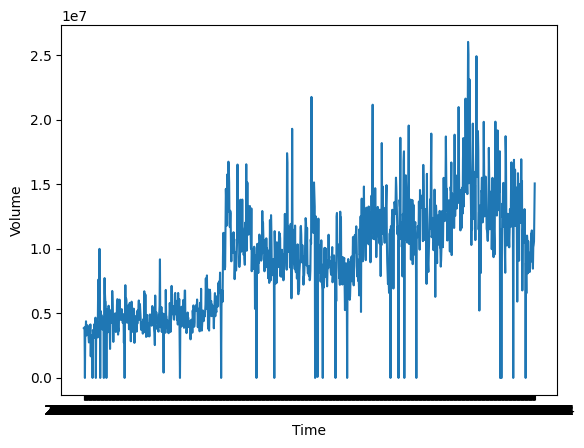

In [186]:
fig, ax = plt.subplots()

ibov_mean_5 = ibov_5_anos['Volume'].rolling(window=30).mean()

ax.plot(ibov_5_anos.index, ibov_5_anos['Volume'])

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Com a figura acima, que é uma representação da variação de volume de ações que estão circulado na IBOVESPA. Como você pode ver, existe uma grande variação e uma tendência de aumento em quantidade de ações em circulação no mercado porém, da maneira como está demonstrada, fica difícil abstrair alguma coisa desse gráfico fora disso.


Então, para ter um pouco mais de abstração com nossas figuras, nós vamos plotar trechos diferentes com cores diferentes que representam a variação desse volume para esses períodos, padronizados em trechos de 1 ano. Adicionalmente, vamos ver a maneira como o número médio de ações variou durante esse período.

Text(0, 0.5, 'Volume')

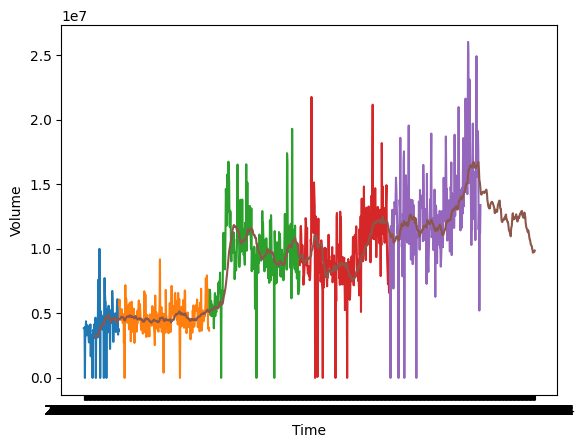

In [187]:
ibov_2018 = ibov_5_anos['2018-01-01':'2018-12-31']
ibov_2019 = ibov_5_anos['2019-01-01':'2019-12-31']
ibov_2020 = ibov_5_anos['2020-01-01':'2020-12-31']
ibov_2021 = ibov_5_anos['2021-01-01':'2021-12-31']
ibov_2022 = ibov_5_anos['2022-01-01':'2022-12-31']

fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Volume'])
ax.plot(ibov_2019.index, ibov_2019['Volume'])
ax.plot(ibov_2020.index, ibov_2020['Volume'])
ax.plot(ibov_2021.index, ibov_2021['Volume'])
ax.plot(ibov_2022.index, ibov_2022['Volume'])
ax.plot(ibov_5_anos.index, ibov_mean_5)

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Vamos, além de analisar a representação gráfica, analisar o perfil que os números pintam em relação ao ano de 2022 para a IBOVESPA e os últimos 5 anos e assim, observar se existe um padrão mantido ou se está diferente o perfil geral para essa bolsa:

In [188]:
mean_vol_ex = ibov_2022['Ev. % Open'].mean()
print(mean_vol_ex)

mean_vol_12 = ibov_2022['Ev. % Close'].mean()
print(mean_vol_12)

mean_vol_13 = ibov_2022['Ev. % High'].mean()
print(mean_vol_13)

mean_vol_ex = ibov_2022['Evolução em volume'].mean()
print(mean_vol_ex)

mean_vol_ex = ibov_2022['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_ex)

0.0003166737518182785
0.0002819321002715647
0.0002901041184129265
9004.0
-11.76


In [190]:
mean_vol_ex1_total = ibov_5_anos['Ev. % Open'].mean()
print(mean_vol_ex1_total)

mean_vol_12_total = ibov_5_anos['Ev. % Close'].mean()
print(mean_vol_12_total)

mean_vol_13_total = ibov_5_anos['Ev. % High'].mean()
print(mean_vol_13_total)

mean_vol_ex_total2 = ibov_5_anos['Evolução em volume'].mean()
print(mean_vol_ex_total2)

mean_vol_ex_total = ibov_5_anos['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_ex_total)

0.0004653847647188975
0.00046671251133001743
0.00039564742977758505
9042.776432606941
-28.766747376916868


Nós agora conseguimos ver a variação no volume, vamos passar para outra constante. Neste caso, valor de abertura de mercado.

Text(0, 0.5, 'Open value')

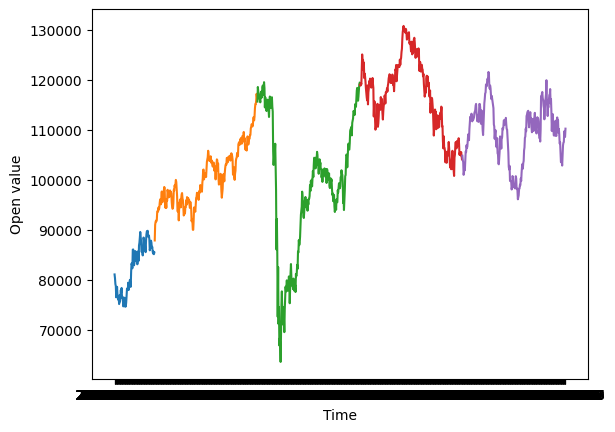

In [191]:

fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Open'])
ax.plot(ibov_2019.index, ibov_2019['Open'])
ax.plot(ibov_2020.index, ibov_2020['Open'])
ax.plot(ibov_2021.index, ibov_2021['Open'])
ax.plot(ibov_2022.index, ibov_2022['Open'])


ax.set_xlabel('Time')
ax.set_ylabel('Open value')

Por curiosidade, vamos visualizar o fato dos valores de fechamento serem muito similares aos de abertura e procurar por alguma anormalidade.

Text(0, 0.5, 'Closing value')

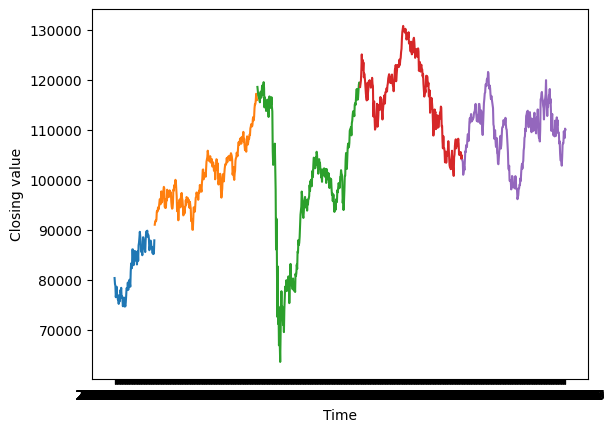

In [192]:
fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Close'])
ax.plot(ibov_2019.index, ibov_2019['Close'])
ax.plot(ibov_2020.index, ibov_2020['Close'])
ax.plot(ibov_2021.index, ibov_2021['Close'])
ax.plot(ibov_2022.index, ibov_2022['Close'])


ax.set_xlabel('Time')
ax.set_ylabel('Closing value')

Agora que temos uma noção superficial do comportamento dos dados, vamos comparar esse comportamento ao comportamento dos dados da bolsa mexicana de valores, a IPC MEXICO. Vamos realizar os mesmos passados que realizamos com a IBOVESPA para manter uma constância nos procedimentos.

In [193]:
ipc_mexico_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,49411.378906,50071.988281,49411.378906,49963.871094,49963.871094,167824600
1,2018-08-08,49979.449219,49987.171875,49670.488281,49894.558594,49894.558594,107393100
2,2018-08-09,49931.519531,49957.000000,49218.851563,49244.398438,49244.398438,126922900
3,2018-08-10,49193.351563,49240.191406,48109.039063,48383.589844,48383.589844,178191700
4,2018-08-13,48383.730469,48902.128906,48365.050781,48767.019531,48767.019531,96122300


In [194]:
ipc_mex_5 = ipc_mexico_5.set_index('Date')

In [195]:
ipc_mex_5['Evolução em volume'] = ipc_mex_5['Volume'].diff()
ipc_mex_5['Evolução OPEN em relação a OPEN anterior'] = ipc_mex_5['Open'].diff()
ipc_mex_5['Diferença entre valores de OPEN e CLOSE'] = ipc_mex_5['Open'] - ipc_mex_5['Close']
ipc_mex_5['Ev. % Open'] = ipc_mex_5['Open'].pct_change()
ipc_mex_5['Ev. % Close'] = ipc_mex_5['Close'].pct_change()
ipc_mex_5['Ev. % High'] = ipc_mex_5['High'].pct_change()
ipc_mex_5['Ev. % Vol'] = ipc_mex_5['Volume'].pct_change()

ipc_mex_5.fillna(0,inplace=True)
ipc_mex_5.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-07,49411.378906,50071.988281,49411.378906,49963.871094,49963.871094,167824600,0.0,0.000000,-552.492188,0.000000,0.000000,0.000000,0.000000
2018-08-08,49979.449219,49987.171875,49670.488281,49894.558594,49894.558594,107393100,-60431500.0,568.070313,84.890625,0.011497,-0.001387,-0.001694,-0.360087
2018-08-09,49931.519531,49957.000000,49218.851563,49244.398438,49244.398438,126922900,19529800.0,-47.929688,687.121093,-0.000959,-0.013031,-0.000604,0.181853
2018-08-10,49193.351563,49240.191406,48109.039063,48383.589844,48383.589844,178191700,51268800.0,-738.167968,809.761719,-0.014784,-0.017480,-0.014349,0.403937
2018-08-13,48383.730469,48902.128906,48365.050781,48767.019531,48767.019531,96122300,-82069400.0,-809.621094,-383.289062,-0.016458,0.007925,-0.006866,-0.460568
2018-08-14,48815.710938,49267.671875,48789.859375,49096.128906,49096.128906,131514600,35392300.0,431.980469,-280.417968,0.008928,0.006749,0.007475,0.368201
2018-08-15,49033.171875,49054.238281,48468.531250,48556.691406,48556.691406,112472600,-19042000.0,217.460937,476.480469,0.004455,-0.010987,-0.004332,-0.144790
2018-08-16,48666.800781,48681.691406,47970.070313,48059.058594,48059.058594,142089600,29617000.0,-366.371094,607.742187,-0.007472,-0.010248,-0.007595,0.263326
2018-08-17,48065.218750,48308.980469,47879.078125,48264.628906,48264.628906,128370700,-13718900.0,-601.582031,-199.410156,-0.012361,0.004277,-0.007656,-0.096551


Plotamos uma noção geral da evolução de volume para a IPC MEXICO:

Text(0, 0.5, 'Volume')

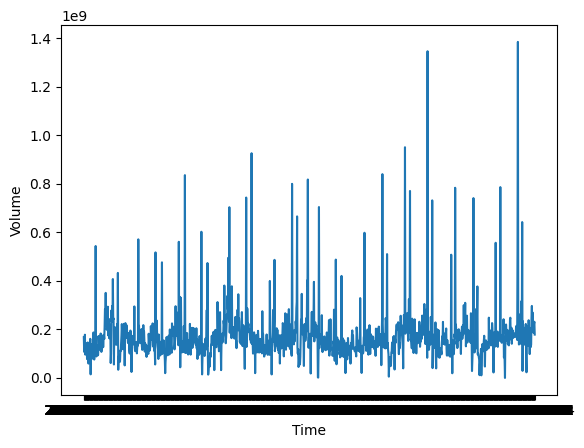

In [196]:
fig, ax = plt.subplots()

ibov_mean_mex_5 = ipc_mex_5['Volume'].rolling(window=30).mean()

ax.plot(ipc_mex_5.index, ipc_mex_5['Volume'])

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Para analisarmos melhor, assim como faremos com a IBOVESPA, iremos fazer a divisão dos períodos anuais por cores.

Text(0, 0.5, 'Volume')

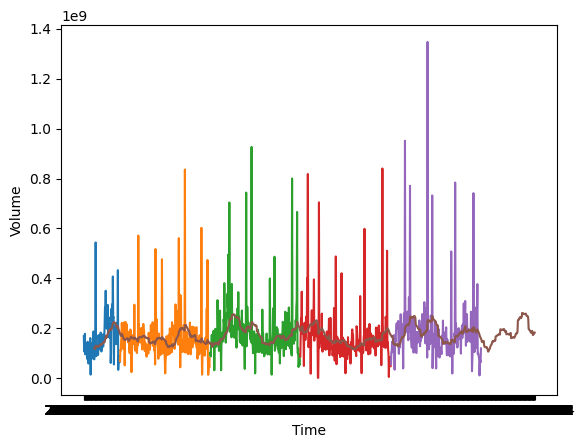

In [197]:
ipc_mexico_2018 = ipc_mex_5['2018-01-01':'2018-12-31']
ipc_mexico_2019 = ipc_mex_5['2019-01-01':'2019-12-31']
ipc_mexico_2020 = ipc_mex_5['2020-01-01':'2020-12-31']
ipc_mexico_2021 = ipc_mex_5['2021-01-01':'2021-12-31']
ipc_mexico_2022 = ipc_mex_5['2022-01-01':'2022-12-31']

fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Volume'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Volume'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Volume'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Volume'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Volume'])
ax.plot(ipc_mex_5.index, ibov_mean_mex_5)

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Apenas ao olhar a base presente no canto superior esquerdo, vemos que o volume de ações é da IPC MEXICO é bem maior, mesmo que existe uma divisão NASDAQ, IPCMEXICO e DOW JONES.

Text(0, 0.5, 'Open value')

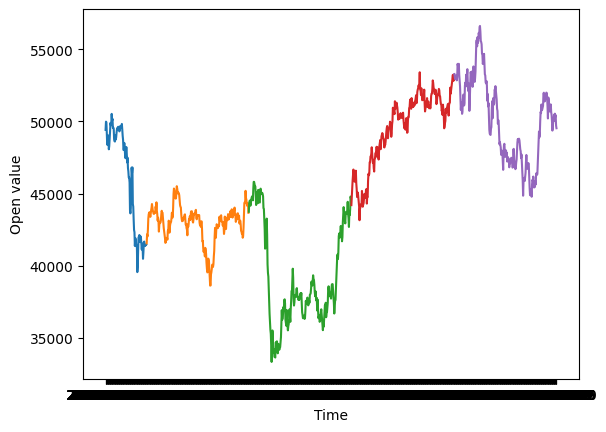

In [200]:
fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Open'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Open'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Open'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Open'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Open'])


ax.set_xlabel('Time')
ax.set_ylabel('Open value')

Nós vemos que o período em verde tem um comportamento similar ao que foi apresentado pela IBOVESPA, mas, observando, vemos o que aparenta ser uma duração maior desse período de baixa, equivalente a 2020 e consequentemente à pandemia.

Text(0, 0.5, 'Closing value')

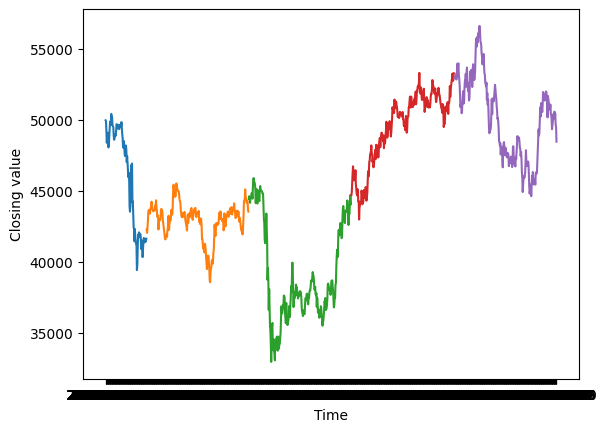

In [201]:
fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Close'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Close'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Close'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Close'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Close'])


ax.set_xlabel('Time')
ax.set_ylabel('Closing value')

Agora que nós traçamos os mesmos gráficos para a bolsa de valores mexicana, vamos puxar novamente os valores respectivos para analisarmos a diferença em dimensão entre eles já em termos de tendência, estão com comportamentos diferentes para os últimos 5 anos.

In [202]:
mean_vol_ex_mex = ipc_mexico_2022['Ev. % Open'].mean()
print(mean_vol_ex_mex)

mean_vol_12_mex = ipc_mexico_2022['Ev. % Close'].mean()
print(mean_vol_12_mex)

mean_vol_13_mex = ipc_mexico_2022['Ev. % High'].mean()
print(mean_vol_13_mex)

mean_vol_ex_mex2 = ipc_mexico_2022['Evolução em volume'].mean()
print(mean_vol_ex_mex2)

mean_vol_opc_diff_mex = ipc_mexico_2022['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_opc_diff_mex)

-0.0002231979213773901
-0.00031988669268649044
-0.00025054619372306855
282560.71428571426
25.460224472221952


VALORES RESPECTIVOS A IBOVESPA x IPC MEXICO para o ano de 2022

Ev. % Open -> 0.0003166737518182785 ; -0.0002231979213773901

Ev. % Close -> 0.0002819321002715647 ; -0.00031988669268649044

Ev. % High -> 0.0002901041184129265 ; -0.00025054619372306855

Evolução em volume -> 9004.0 ; 282560.71428571426

Diferença entre valores de OPEN e CLOSE -> -11.76 ; 25.460224472221952

In [203]:
mean_vol_ex_mex5 = ipc_mex_5['Ev. % Open'].mean()
print(mean_vol_ex_mex5)

mean_vol_12_mex5 = ipc_mex_5['Ev. % Close'].mean()
print(mean_vol_12_mex5)

mean_vol_13_mex5 = ipc_mex_5['Ev. % High'].mean()
print(mean_vol_13_mex5)

mean_vol_ex_mex5 = ipc_mex_5['Evolução em volume'].mean()
print(mean_vol_ex_mex5)

mean_vol_opc_diff_mex5 = ipc_mex_5['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_opc_diff_mex5)

0.00011504361727795319
0.00012327735250726871
0.00010526661781567438
8628.276409849086
11.514331189833081


VALORES RESPECTIVOS A IBOVESPA x IPC MEXICO para o período de 2018 - 2022

Ev. % Open -> 0.0004653847647188975 ; 0.00011504361727795319

Ev. % Close -> 0.00046671251133001743 ; 0.00012327735250726871

Ev. % High -> 0.00039564742977758505 ; 0.00010526661781567438

Evolução em volume -> 9042.776432606941 ; 8628.276409849086

Diferença entre valores de OPEN e CLOSE -> -28.766747376916868 ; 11.514331189833081


Vemos então, pela diferença entre as porcentagens positivas de abertura e de fechamento das negociações, que a bolsa IBOVESPA indica uma variação maior com um crescimento aliado a essa variação, embora seja uma bolsa com um volume significativamente menor, o que pode justificar a menor volatilidade da IPC MEXICO.

***FIM DO DIA 1***